## Jiayue Meng
## Q1
### a

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
measure_df = pd.read_excel(r"C:/Users/Joyce/Desktop/MeasurementData_Q1.xlsx") # read csv file as dataframe
measure_df.head() # show the first 5 rows of the table

,Year,Measurement
0,1984,539.9
1,1985,558.1
2,1986,620.1
3,1987,612.5
4,1988,640.6


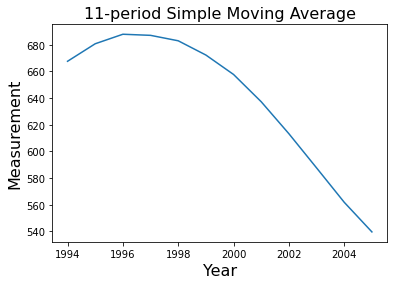

In [157]:
# make a function to calculate simple moving average
def simple_m_avg(period):
    y = [np.nan]*(period-1) # set the first period-1 elements in the list as nan
    for x in range(len(measure_df['Measurement'])-period+1):
        yt = measure_df['Measurement'][x:(x+period)].mean() # calculate the simple moving avg with period
        y.append(yt) # put the simple moving avg to the list
    return y

mavg11 = simple_m_avg(11) # calculate simple moving avg when period = 11

# draw the plot
plt.figure()
plt.plot(measure_df['Year'], mavg11)
plt.title('11-period Simple Moving Average', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Measurement', fontsize = 16)
plt.show()

### b

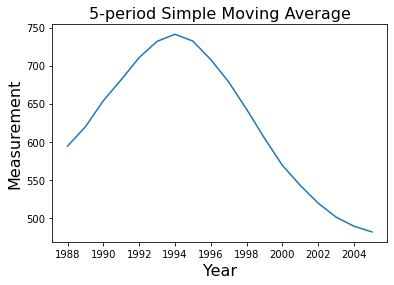

In [158]:
mavg5 = simple_m_avg(5) # calculate simple moving avg when period = 5

# draw the plot
plt.figure()
plt.plot(measure_df['Year'], mavg5)
plt.xticks(np.arange(1988,2006,2)) # remove decimals in Year
plt.title('5-period Simple Moving Average', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Measurement', fontsize = 16)
plt.show()

### c
Simple Moving Average reacts faster when span is shorter.If the span is shorter, the average will be more sensitive to the change of the data; if the span is longer, the average will be less sensitive to the change of data. Variance reduces as span increases. The plot becomes smoother when span increases. There are also more bias if span increases. 


## Q3
### a

In [159]:
ydata_df = pd.read_excel(r"C:/Users/Joyce/Desktop/Yield_Data.xlsx") # read the excel file 
ydata_df.head() # show the first 5 rows

,Hour,"Yield, %"
0,1,89.0
1,2,90.5
2,3,91.5
3,4,93.2
4,5,93.9


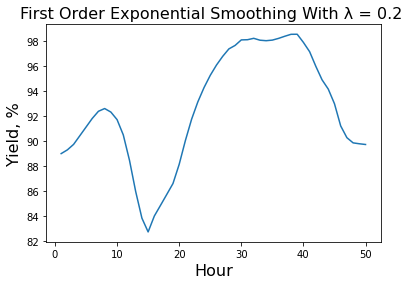

In [160]:
# Make a function to calculate smoothed values
def first_order_exp(series,lam):
    exp = pd.Series(index = series.index, dtype = np.double) # create a series with the same index
    exp[0] = series[0] # the first element of the series is the original data
    for i in range(1,len(series)):
        exp[i] = lam*series[i]+(1-lam)*exp[i-1] # calculate the smoothed values, and set elements in the series as smoothed values
    return exp

first_order_2 = first_order_exp(ydata_df['Yield, %'],0.2) # calculate smoothed values when lambda = 0.2

#draw the plot
plt.figure()
plt.plot(ydata_df['Hour'], first_order_2)
plt.title('First Order Exponential Smoothing With λ = 0.2 ', fontsize = 16)
plt.xlabel('Hour', fontsize = 16)
plt.ylabel('Yield, %', fontsize = 16)
plt.show()

### b

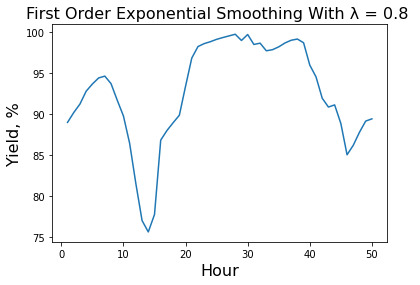

In [161]:
first_order_8 = first_order_exp(ydata_df['Yield, %'],0.8)# calculate smoothed values when lambda = 0.8

#draw the plot
plt.figure()
plt.plot(ydata_df['Hour'], first_order_8)
plt.title('First Order Exponential Smoothing With λ = 0.8 ', fontsize = 16)
plt.xlabel('Hour', fontsize = 16)
plt.ylabel('Yield, %', fontsize = 16)
plt.show()

### c

In [162]:
# write a mean square error function to calculate mse between original data and the smoothed data
def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

In [163]:
mse(ydata_df['Yield, %'], first_order_2) # calculate the MSE between original data and the smoothed data for lambda = 0.2. The MSE is 15.671048945737011.

15.671048945737011

In [164]:
mse(ydata_df['Yield, %'], first_order_8) # calculate the MSE between original data and the smoothed data for lambda = 0.8. The MSE is 0.2950579416051249.

0.2950579416051249

Smoothing constant λ = 0.8 produced a lower error because the current observation is weighted more when λ = 0.8 than that when λ = 0.2. 